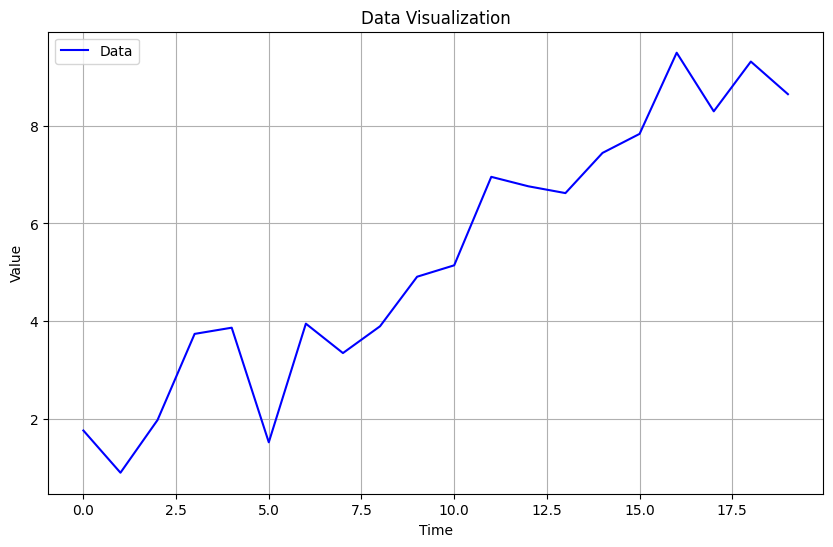

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# 示例数据：生成一个带线性趋势的时间序列
np.random.seed(0)
time = np.arange(20)
data = 0.5 * time + np.random.randn(20)  # 线性趋势加上一些随机噪声

# 绘制数据图
plt.figure(figsize=(10, 6))
plt.plot(time, data, label="Data", color='b')
plt.title("Data Visualization")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


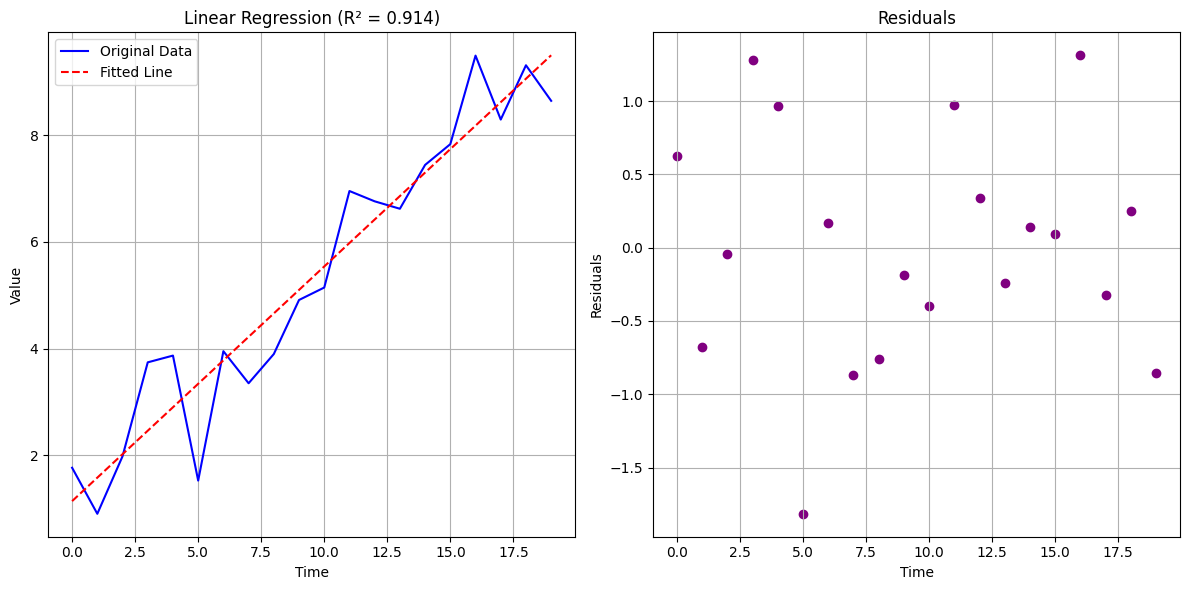

In [62]:
from sklearn.linear_model import LinearRegression

# Reshape time for sklearn model
time_reshaped = time.reshape(-1, 1)

# 线性回归模型拟合
model = LinearRegression()
model.fit(time_reshaped, data)

# 拟合值
fitted_values = model.predict(time_reshaped)

# 计算拟合度（R^2）
r_squared = model.score(time_reshaped, data)

# 计算残差
residuals = data - fitted_values

# 绘制拟合结果与残差
plt.figure(figsize=(12, 6))

# 绘制原始数据和拟合直线
plt.subplot(1, 2, 1)
plt.plot(time, data, label="Original Data", color='b')
plt.plot(time, fitted_values, label="Fitted Line", color='r', linestyle='--')
plt.title(f"Linear Regression (R² = {r_squared:.3f})")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)

# 绘制残差
plt.subplot(1, 2, 2)
plt.scatter(time, residuals, color='purple')
plt.title("Residuals")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.grid(True)

plt.tight_layout()
plt.show()


In [63]:
from statsmodels.tsa.stattools import adfuller

# 执行ADF检验
adf_result = adfuller(data)

# 输出ADF检验结果
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])

# 判断是否平稳
if adf_result[1] < 0.9:
    print("拒绝原假设，数据是平稳的")
else:
    print("接受原假设，数据是非平稳的")


ADF Statistic: -0.6409088971702984
p-value: 0.8614678271883232
Critical Values: {'1%': np.float64(-4.137829282407408), '5%': np.float64(-3.1549724074074077), '10%': np.float64(-2.7144769444444443)}
拒绝原假设，数据是平稳的


In [64]:
# 计算标准差和方差
std_dev = np.std(data)
variance = np.var(data)

print(f"标准差: {std_dev:.3f}")
print(f"方差: {variance:.3f}")


标准差: 2.654
方差: 7.045


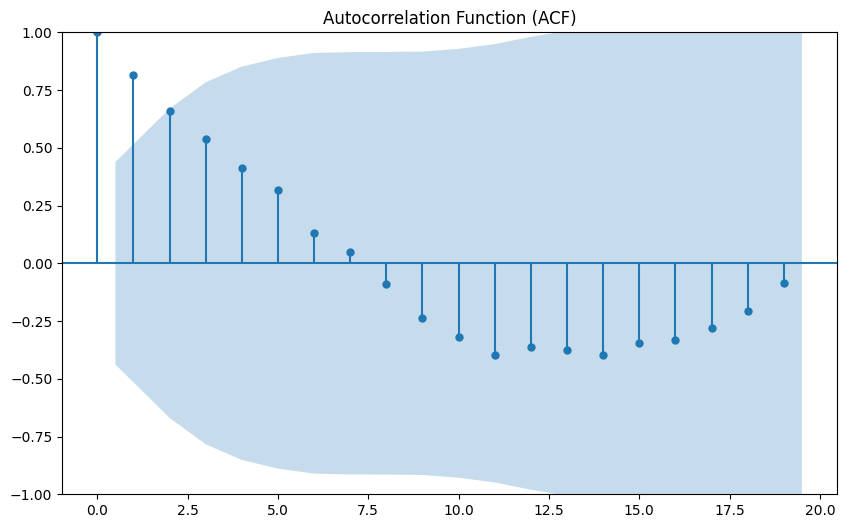

In [65]:
from statsmodels.graphics.tsaplots import plot_acf

# 绘制自相关图
plt.figure(figsize=(10, 6))
plot_acf(data, lags=19, ax=plt.gca())
plt.title("Autocorrelation Function (ACF)")
plt.show()


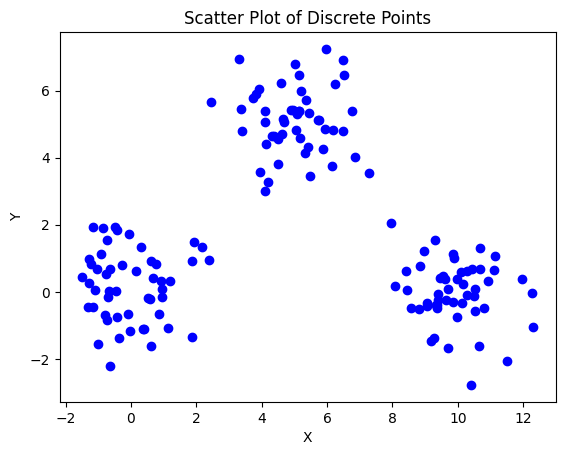

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# 生成一些离散点数据
np.random.seed(0)
cluster1 = np.random.randn(50, 2) + np.array([5, 5])  # 第一个簇
cluster2 = np.random.randn(50, 2) + np.array([0, 0])  # 第二个簇
cluster3 = np.random.randn(50, 2) + np.array([10, 0])  # 第三个簇

# 合并所有点
data = np.vstack([cluster1, cluster2, cluster3])

# 绘制原始数据
plt.scatter(data[:, 0], data[:, 1], c='blue', label='Data Points')
plt.title("Scatter Plot of Discrete Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


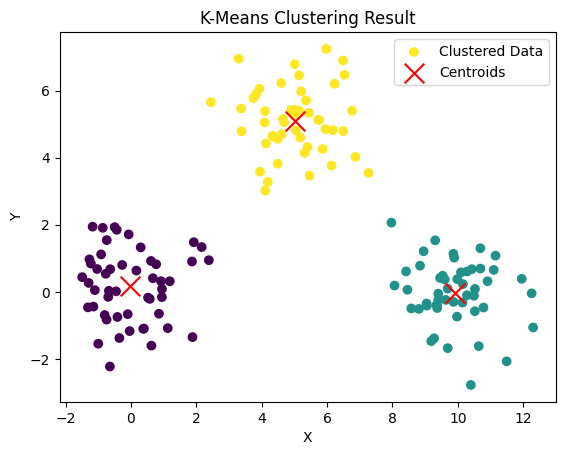

聚类中心：
 [[-0.01872153  0.18274747]
 [ 9.90692676 -0.02539128]
 [ 5.01680616  5.10280987]]
每个点的簇标签： [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [67]:
from sklearn.cluster import KMeans

# 设置聚类的数量 (这里选择3，假设我们已经知道大致的簇的数量)
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data)

# 获取聚类结果
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# 绘制聚类结果
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', label='Clustered Data')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title("K-Means Clustering Result")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

# 打印聚类信息
print("聚类中心：\n", centroids)
print("每个点的簇标签：", labels)
